# Conduct postprocessing on simulated realizations
March 11, 2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy import ndimage

the first realization is: 


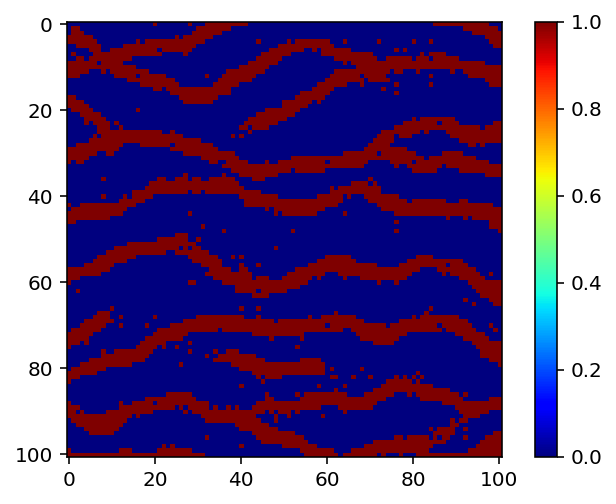

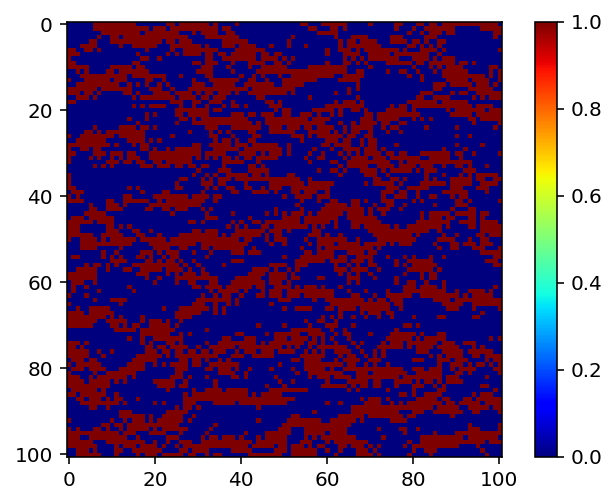

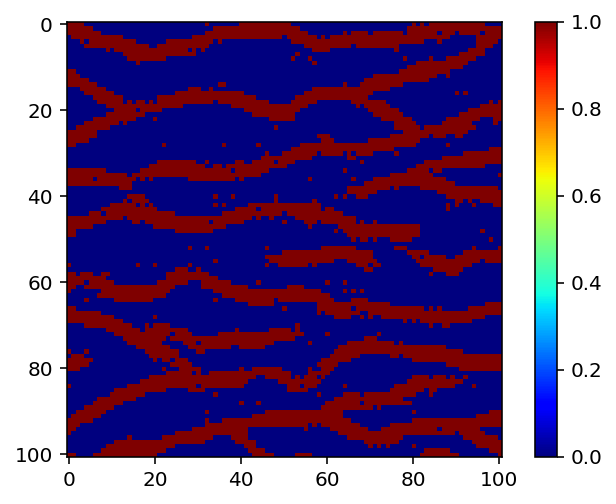

In [2]:
# read the original realization

RealizationAmountPerSet = 200
TI_Width = 101
TI_Height = 101


# Realization_0 = np.loadtxt(fname='Realizations_original.txt',dtype='int',delimiter=',')
# Realization_0 = Realization_0.reshape((RealizationAmountPerSet,TI_Height,TI_Width))

# Realization_1 = np.loadtxt(fname='Realizations_FCNN.txt',dtype='int',delimiter=',')
# Realization_1 = Realization_1.reshape((RealizationAmountPerSet,TI_Height,TI_Width))

Realization_0 = np.loadtxt(fname='Realizations_All_BallTree.txt',dtype='int',delimiter=',')
Realization_0 = Realization_0.reshape((RealizationAmountPerSet,TI_Height,TI_Width))

Realization_1 = np.loadtxt(fname='Realizations_FCNN_BallTree.txt',dtype='int',delimiter=',')
Realization_1 = Realization_1.reshape((RealizationAmountPerSet,TI_Height,TI_Width))

Realization_2 = np.loadtxt(fname='Realizations_TeacherStudent_BallTree.txt',dtype='int',delimiter=',')
Realization_2 = Realization_2.reshape((RealizationAmountPerSet,TI_Height,TI_Width))

Realization_3 = np.loadtxt(fname='Realizations_DS.txt',dtype='int',delimiter=',')
Realization_3 = Realization_3.reshape((RealizationAmountPerSet,TI_Height,TI_Width))

print("the first realization is: ")
plt.imshow(Realization_0[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

plt.imshow(Realization_1[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

plt.imshow(Realization_2[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

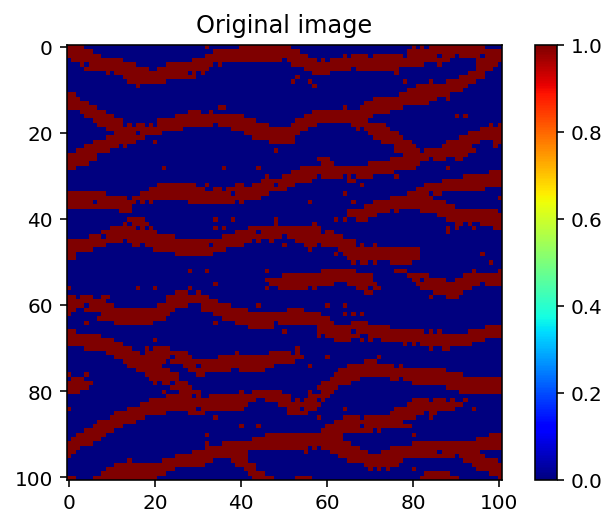

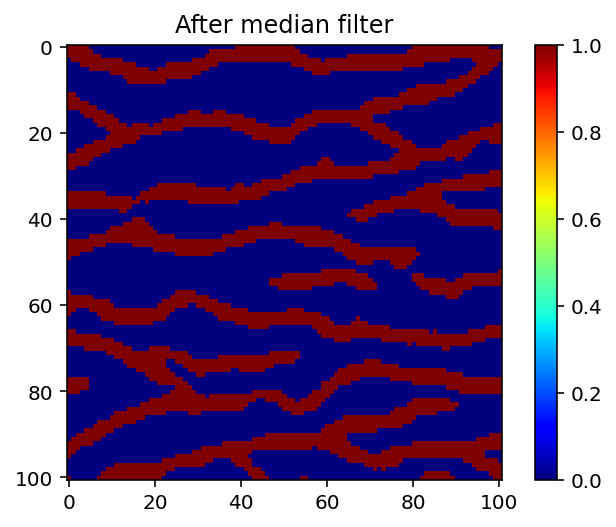

In [3]:
image = ndimage.median_filter(Realization_2[0], size = 3)

plt.imshow(Realization_2[0],vmin=0, vmax=1,cmap='jet')
plt.title(f'Original image')
plt.colorbar()  # show color scale
plt.show()

plt.imshow(image,vmin=0, vmax=1,cmap='jet')
plt.title(f'After median filter')
plt.colorbar()  # show color scale
plt.show()

the first realization is: 


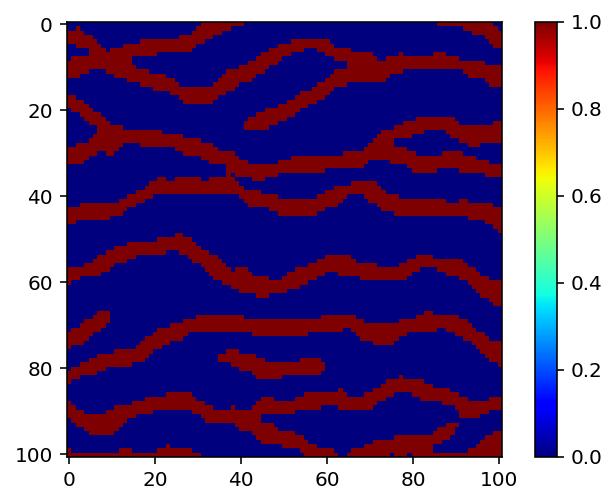

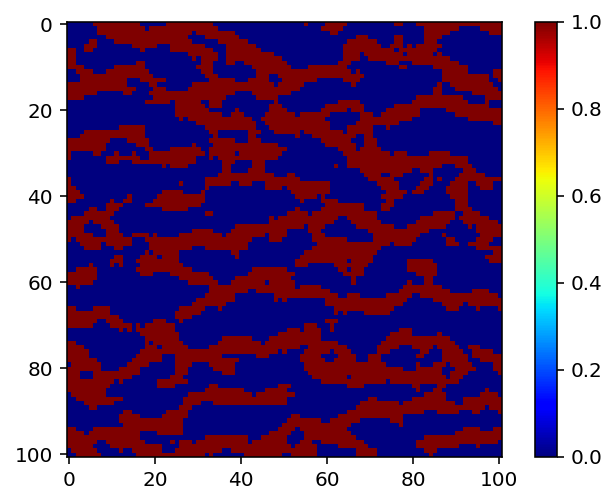

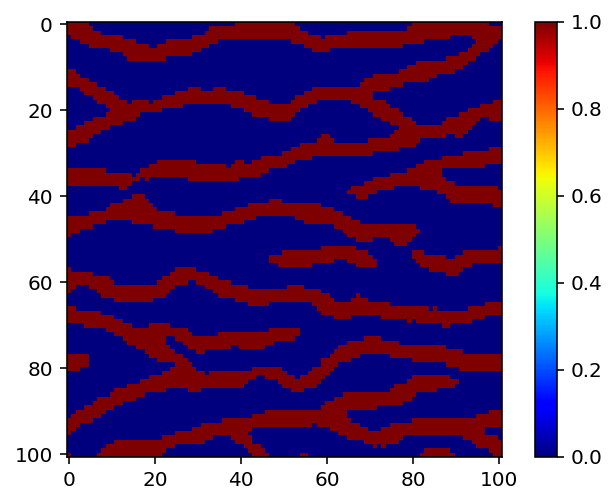

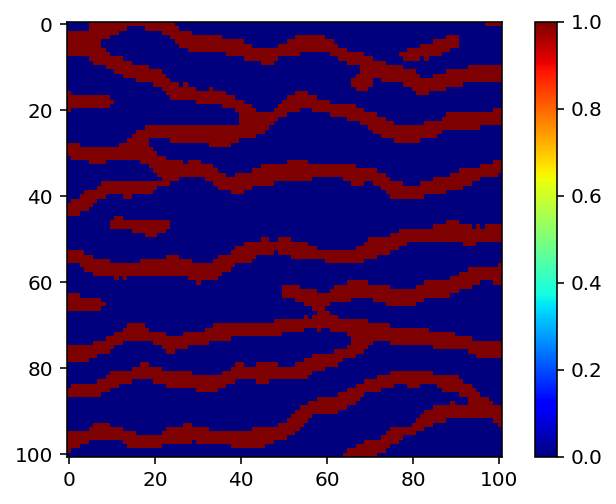

In [4]:
# perform median filter to every realization

Template_Size = 3

Realization_0_processed = np.empty((RealizationAmountPerSet,TI_Height,TI_Width))
Realization_1_processed = np.empty((RealizationAmountPerSet,TI_Height,TI_Width))
Realization_2_processed = np.empty((RealizationAmountPerSet,TI_Height,TI_Width))
Realization_3_processed = np.empty((RealizationAmountPerSet,TI_Height,TI_Width))

for realization_index in range(RealizationAmountPerSet):
    Realization_0_processed[realization_index] = np.copy(ndimage.median_filter(Realization_0[realization_index], size = Template_Size))
    
    Realization_1_processed[realization_index] = np.copy(ndimage.median_filter(Realization_1[realization_index], size = Template_Size))
    
    Realization_2_processed[realization_index] = np.copy(ndimage.median_filter(Realization_2[realization_index], size = Template_Size))
    
    Realization_3_processed[realization_index] = np.copy(ndimage.median_filter(Realization_3[realization_index], size = Template_Size))
    
print("the first realization is: ")
plt.imshow(Realization_0_processed[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

plt.imshow(Realization_1_processed[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

plt.imshow(Realization_2_processed[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

plt.imshow(Realization_3_processed[0],vmin=0, vmax=1,cmap='jet')
plt.colorbar()  # show color scale
plt.show()

In [5]:
# store processed images
np.savetxt(fname='Realizations_postprocessed_All_BallTree.txt',X=Realization_0_processed.reshape((1,-1)),fmt='%d',delimiter=',')
np.savetxt(fname='Realizations_postprocessed_FCNN_BallTree.txt',X=Realization_1_processed.reshape((1,-1)),fmt='%d',delimiter=',')
np.savetxt(fname='Realizations_postprocessed_TeacherStudent_BallTree.txt',X=Realization_2_processed.reshape((1,-1)),fmt='%d',delimiter=',')

np.savetxt(fname='Realizations_postprocessed_DS.txt',X=Realization_3_processed.reshape((1,-1)),fmt='%d',delimiter=',')